## Analyzing phi vs eta again, this time with correct mallows gen function

Here is the actual mallows generation code

In [166]:
import numpy as np

# num = number of ranks
# N = length of each rank
def generateMallowsSet(num, N, eta, centroid=0):
    swaps = 0
    if centroid == 0:
        centroid = np.arange(N)
    list = []
    for _ in range(num):
        ord = np.arange(N)
        ord[0] = centroid[0]
        for i in range(1, N):
            ord[i] = centroid[i]
            j = i
            while (eta > np.random.uniform(0.0,1.0) and j >= 1):
                ord[j], ord[j-1] = ord[j-1], ord[j]
                swaps += 1
                j -= 1
            print(j, swaps)

        list.append(ord)
    # actual func returns the list here
    return swaps

In [167]:
generateMallowsSet(1, 10, 0.99, 0)

0 1
0 3
0 6
0 10
0 15
0 21
0 28
0 36
0 45


45

With 99% swap chance it swaps 45 times

In [170]:
def max_swaps(N):
    return (N * (N+1)) / 2
print(max_swaps(10))

55.0


We use geometric series here, so lets define some helper functions

In [159]:


def partial_sum(s=1, r=0.5, n=100) : 
    return (r * (1 - pow(r, n))) / (1 - r) 


print(partial_sum(r = (1/2.0), n = 100))  

1.0


In [160]:
def sum_of_partial_sums(ratio, N):
    s = 0
    for i in range(1,N):
        p = partial_sum(r = ratio, n = i)
        s += p
        # print(i,s,'\t',p)
    return s

sum_of_partial_sums((1/2.0),11)

9.0009765625

In [162]:
r = 0.0
data = []
while r <= 1.0:
    print("%.2f" %r, "%.4f" %sum_of_partial_sums(r,12))
    data.append((r, sum_of_partial_sums(r,12)))
    r += 0.05

0.00 0.0000
0.05 0.5762
0.10 1.2099
0.15 1.9100
0.20 2.6875
0.25 3.5556
0.30 4.5306
0.35 5.6331
0.40 6.8889
0.45 8.3307
0.50 10.0005
0.55 11.9527
0.60 14.2582
0.65 17.0098
0.70 20.3299
0.75 24.3801
0.80 29.3744
0.85 35.5958
0.90 43.4187
0.95 53.3368


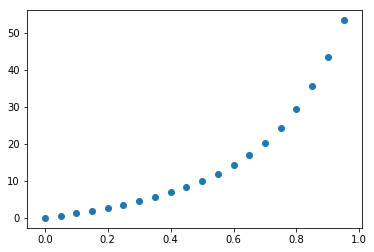

In [164]:
import matplotlib.pyplot as plt

r,swaps = zip(*data)
plt.scatter(r,swaps)
plt.show()